<a href="https://colab.research.google.com/github/Potsane97/portfolio_mesh/blob/main/online_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import libraries
!pip install -U kaleido
import pandas as pd

In [3]:
# Load dataset
df = pd.read_csv("data-2.csv", encoding="ISO-8859-1")

In [4]:
# Preview first 5 rows
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [5]:
# Check basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


**Handle Missing Values**

In [6]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [7]:
# Remove rows with missing CustomerID
df = df.dropna(subset=['CustomerID', 'Description'])

Remove Returns & Invalid Quantities

Returns are usually negative Quantity.

We’ll keep only positive quantities and prices.

In [8]:
# Remove negative or zero quantities
df = df[df['Quantity'] > 0]

# Remove rows with zero or negative prices
df = df[df['UnitPrice'] > 0]

Fix Data Types

In [9]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Convert CustomerID to integer
df['CustomerID'] = df['CustomerID'].astype(int)

Add Revenue Column

In [10]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [11]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int64         
 7   Country      397884 non-null  object        
 8   Revenue      397884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 30.4+ MB
None
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HE

**Sales KPIs**

We’ll look at total revenue, number of transactions, and unique customers.

In [12]:
# Total revenue
total_revenue = df['Revenue'].sum()

# Number of transactions (unique InvoiceNo)
total_transactions = df['InvoiceNo'].nunique()

# Unique customers
unique_customers = df['CustomerID'].nunique()

print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Transactions: {total_transactions}")
print(f"Unique Customers: {unique_customers}")


Total Revenue: $8,911,407.90
Total Transactions: 18532
Unique Customers: 4338


Top 10 Best-Selling Products (by revenue)

In [13]:
top_products = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)
print(top_products)


Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: Revenue, dtype: float64


Sales by Country

In [14]:
country_sales = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)
print(country_sales)


Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Australia          138521.310
Spain               61577.110
Switzerland         56443.950
Belgium             41196.340
Sweden              38378.330
Name: Revenue, dtype: float64


Monthly Sales Trend

<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Month'>

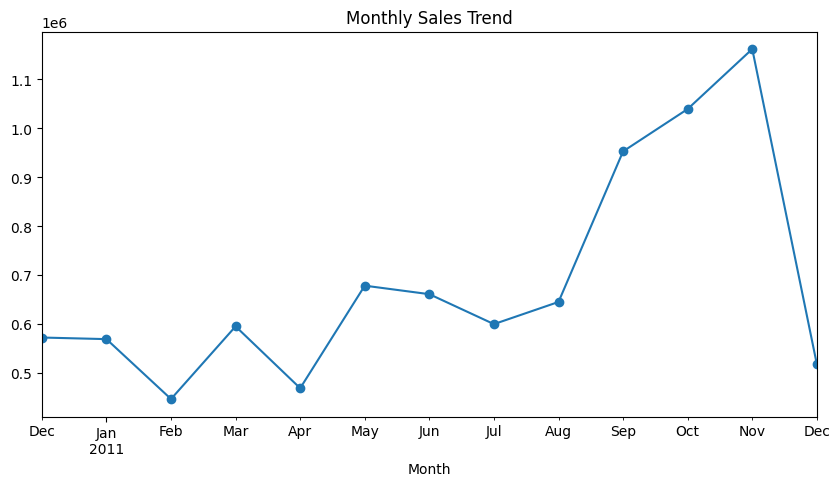

In [15]:
# Create month column
df['Month'] = df['InvoiceDate'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Revenue'].sum()

monthly_sales.plot(kind='line', marker='o', figsize=(10,5), title='Monthly Sales Trend')


Top Customers (by total spend)

In [16]:
top_customers = df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10)
print(top_customers)


CustomerID
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
12415    124914.53
14156    117379.63
17511     91062.38
16029     81024.84
12346     77183.60
Name: Revenue, dtype: float64


**Visualizations**

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

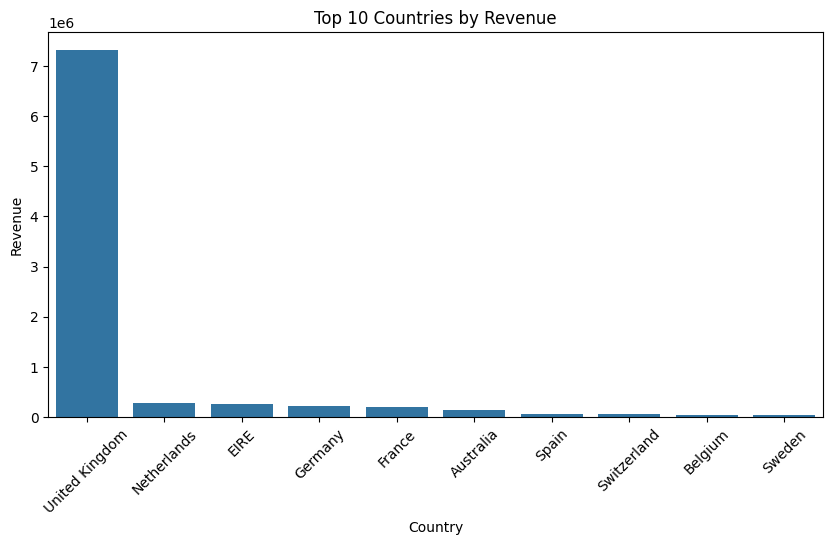

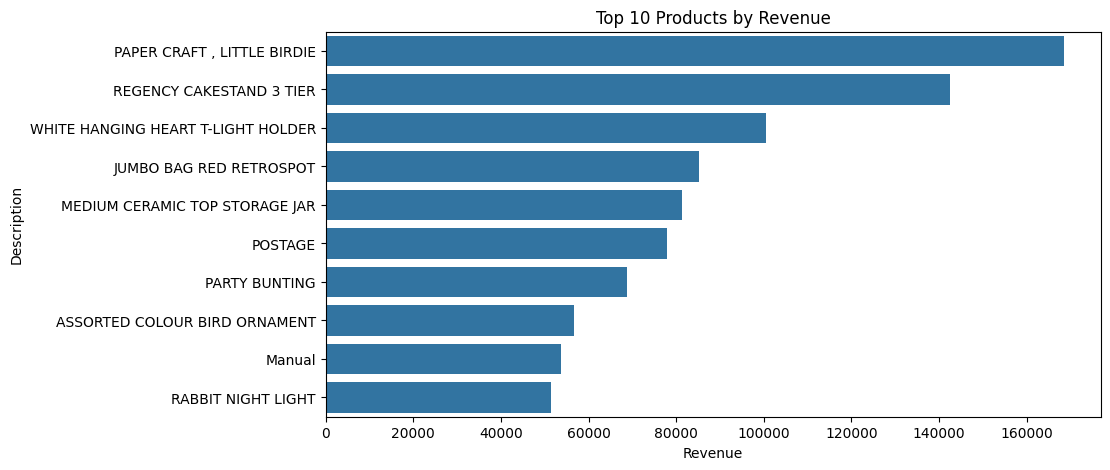

In [18]:
# Sales by country
plt.figure(figsize=(10,5))
sns.barplot(x=country_sales.index, y=country_sales.values)
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Revenue')
plt.ylabel('Revenue')
plt.show()

# Top products by revenue
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue')
plt.show()

Hourly Sales Trend (Customer Buying Times)

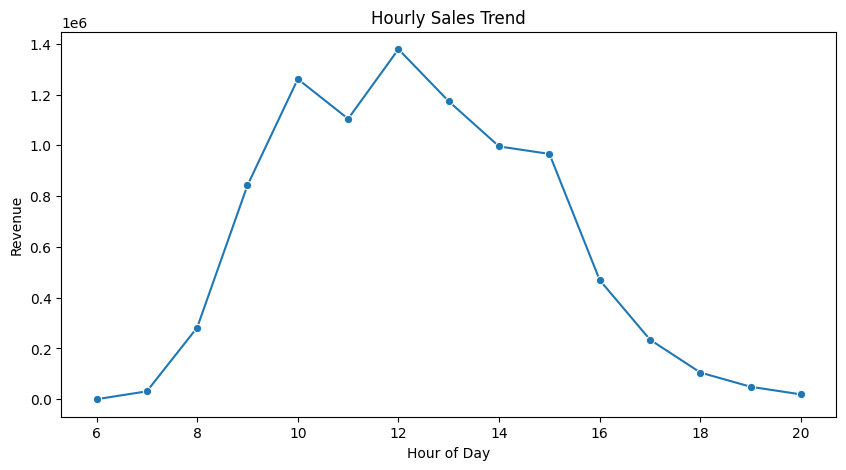

In [19]:
df['Hour'] = df['InvoiceDate'].dt.hour

plt.figure(figsize=(10,5))
sns.lineplot(x='Hour', y='Revenue', data=df.groupby('Hour', as_index=False)['Revenue'].sum(), marker='o')
plt.title('Hourly Sales Trend')
plt.xlabel('Hour of Day')
plt.ylabel('Revenue')
plt.show()


Sales Heatmap (Day vs Hour)

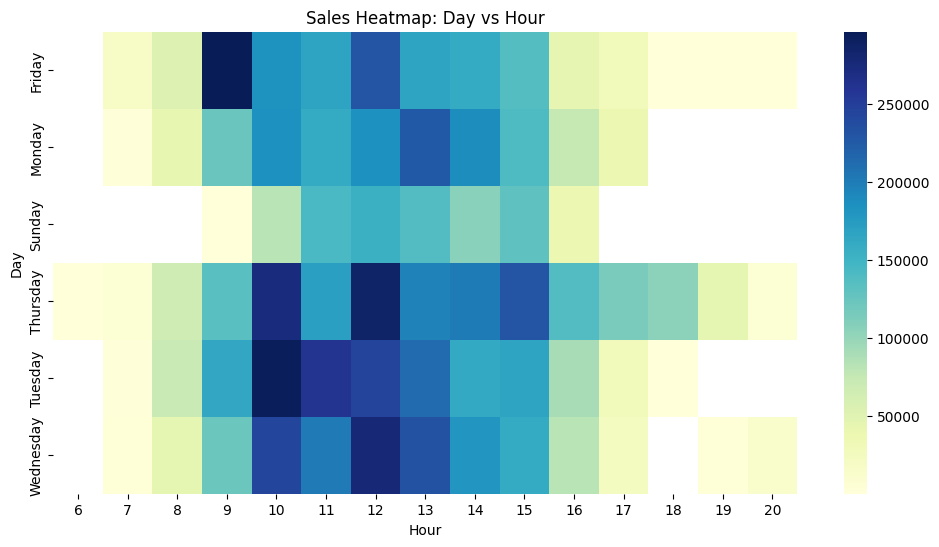

In [20]:
df['Day'] = df['InvoiceDate'].dt.day_name()

# Pivot for heatmap
heatmap_data = df.pivot_table(values='Revenue', index='Day', columns='Hour', aggfunc='sum')

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Sales Heatmap: Day vs Hour')
plt.show()


Top 10 Customers Spending Pattern

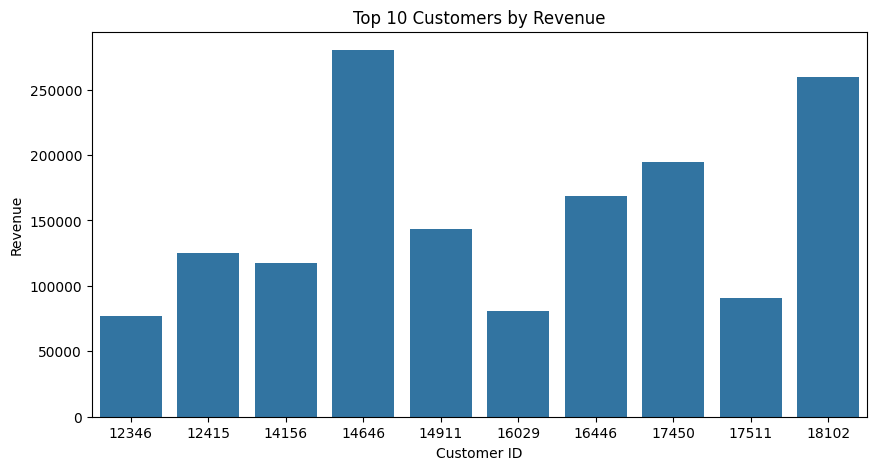

In [22]:
top_10_customers = df.groupby('CustomerID')['Revenue'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='CustomerID', y='Revenue', data=top_10_customers)
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Revenue')
plt.show()


All Plots combined

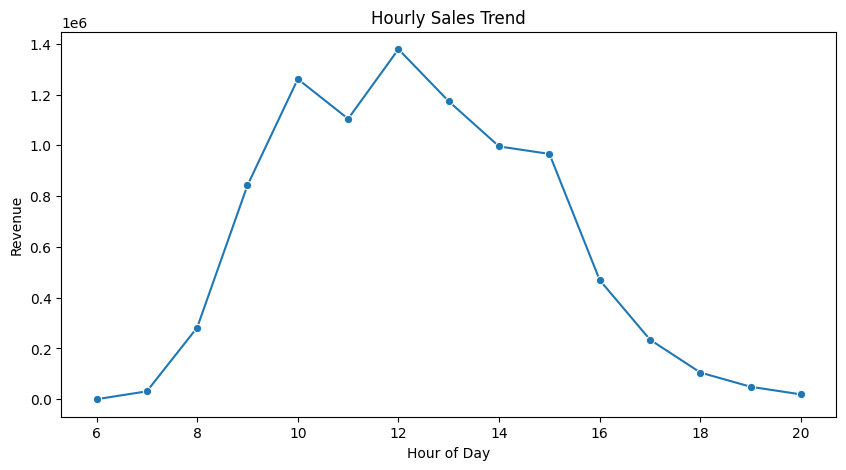

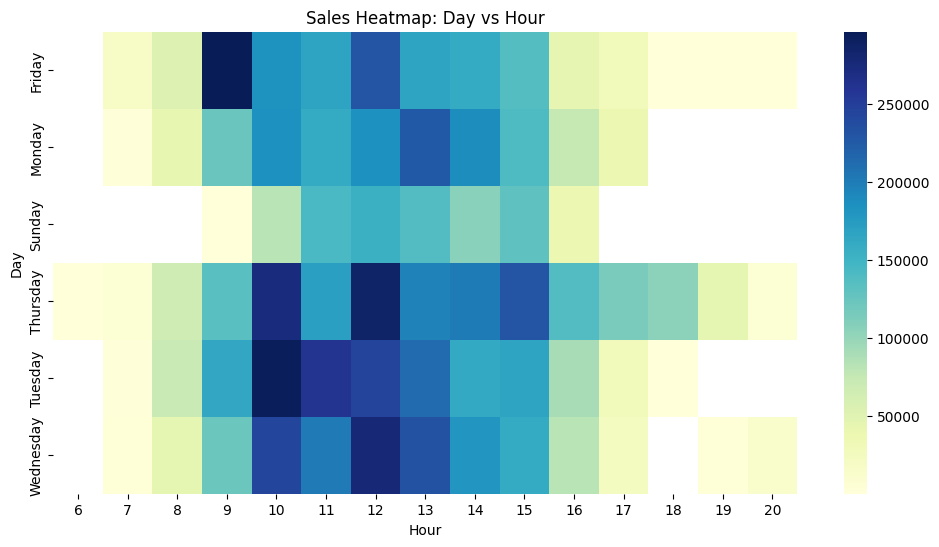

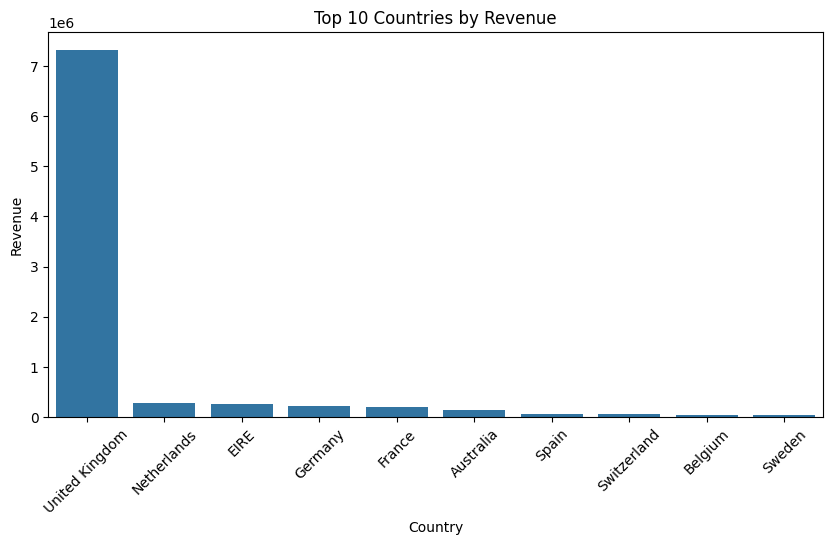

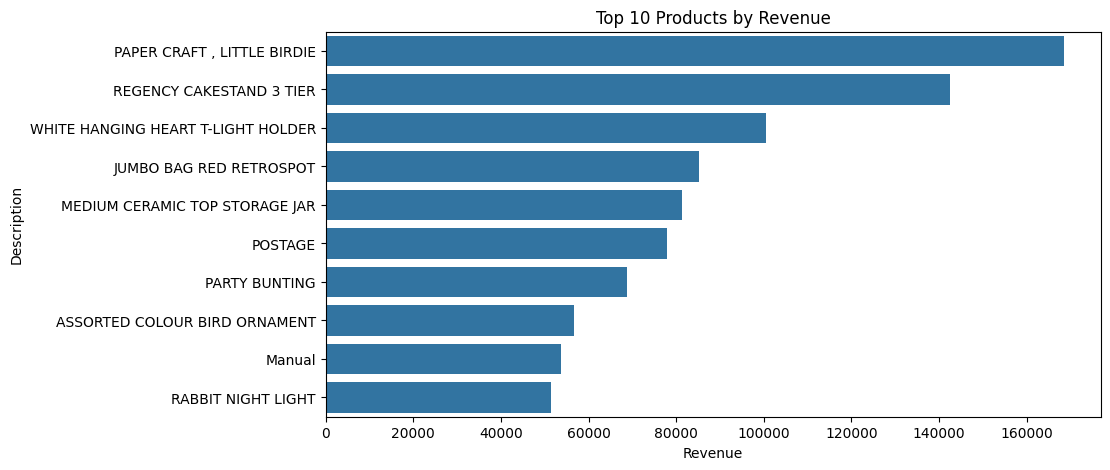

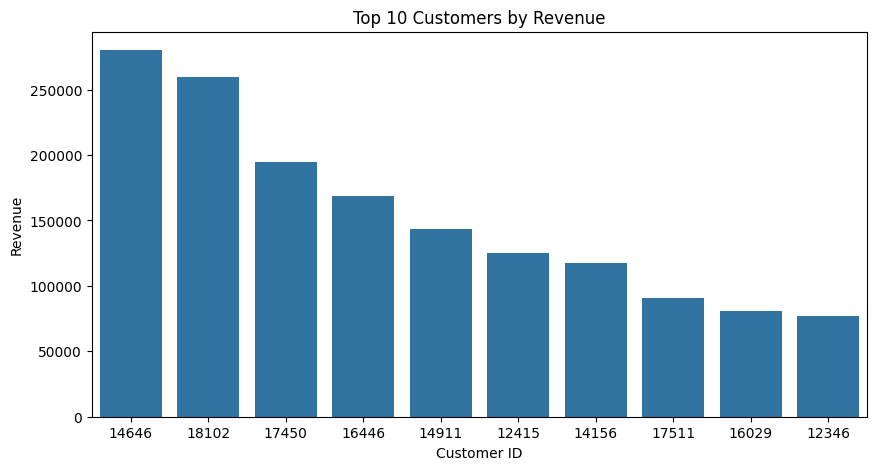

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Hourly Sales Trend
df['Hour'] = df['InvoiceDate'].dt.hour
hourly_sales = df.groupby('Hour', as_index=False)['Revenue'].sum()

plt.figure(figsize=(10,5))
sns.lineplot(x='Hour', y='Revenue', data=hourly_sales, marker='o')
plt.title('Hourly Sales Trend')
plt.xlabel('Hour of Day')
plt.ylabel('Revenue')
plt.show()

# 2️⃣ Sales Heatmap (Day vs Hour)
df['Day'] = df['InvoiceDate'].dt.day_name()
heatmap_data = df.pivot_table(values='Revenue', index='Day', columns='Hour', aggfunc='sum')

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Sales Heatmap: Day vs Hour')
plt.show()

# 3️⃣ Top 10 Countries by Revenue
country_sales = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=country_sales.index, y=country_sales.values)
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Revenue')
plt.ylabel('Revenue')
plt.show()

# 4️⃣ Top 10 Products by Revenue
top_products = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue')
plt.show()

# 5️⃣ Top 10 Customers by Revenue
top_customers = df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values)
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Revenue')
plt.show()


2025-08-15 18:38:00.541 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-15 18:38:00.542 No runtime found, using MemoryCacheStorageManager
2025-08-15 18:38:00.544 No runtime found, using MemoryCacheStorageManager
2025-08-15 18:38:00.551 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-15 18:38:00.552 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-15 18:38:00.553 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-15 18:38:00.554 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-15 18:38:01.055 Thread 'Thread-4': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-15 18:38:01.056 Thread 'Thread-4': missing ScriptRunContext! This warning can be ignored w

DeltaGenerator()

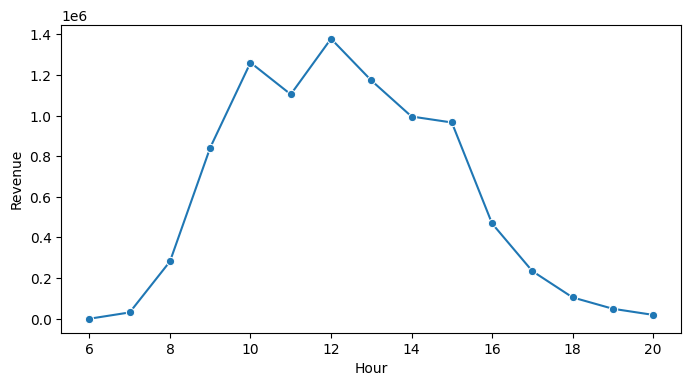

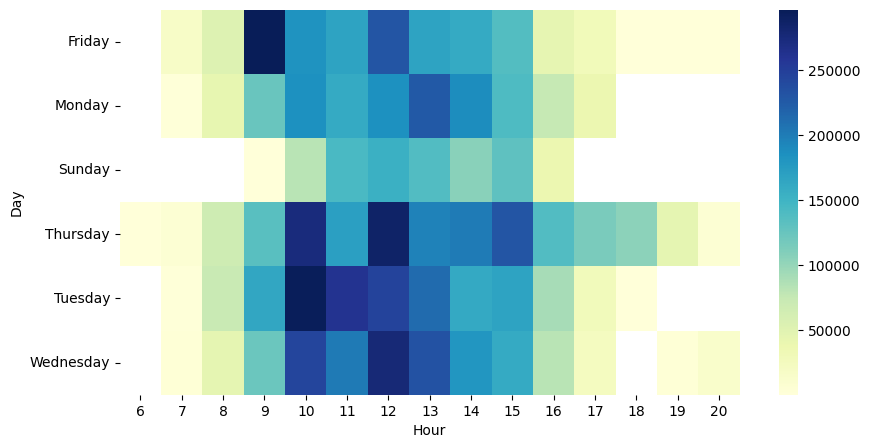

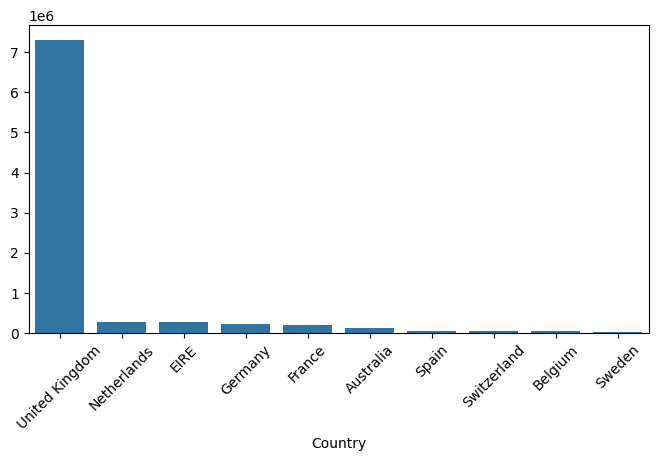

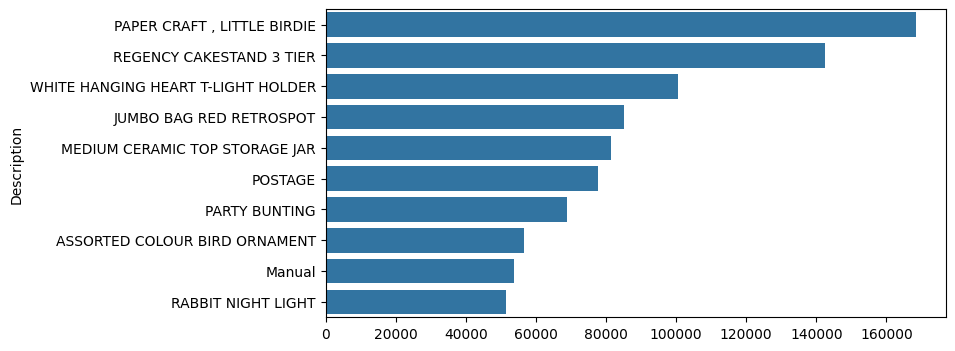

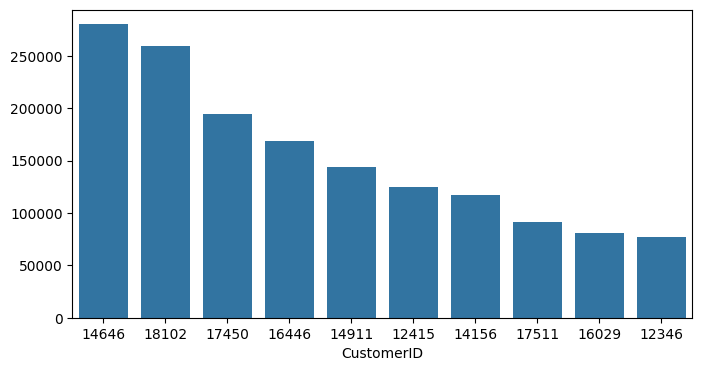

In [26]:
!pip install streamlit
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- PAGE CONFIG ---
st.set_page_config(page_title="Sales Data Dashboard", layout="wide")

# --- LOAD DATA ---
@st.cache_data
def load_data():
    df = pd.read_csv("data-2.csv", encoding="ISO-8859-1")

    # Clean dataset
    df = df.dropna(subset=['CustomerID', 'Description'])
    df = df[df['Quantity'] > 0]
    df = df[df['UnitPrice'] > 0]
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    df['CustomerID'] = df['CustomerID'].astype(int)
    df['Revenue'] = df['Quantity'] * df['UnitPrice']

    return df

df = load_data()

# --- TITLE ---
st.title("📊 Sales Data Analysis Dashboard")

# --- FILTER ---
country_filter = st.sidebar.multiselect("Select Country", options=df['Country'].unique(), default=df['Country'].unique())
df = df[df['Country'].isin(country_filter)]

# --- HOURLY SALES TREND ---
st.subheader("Hourly Sales Trend")
df['Hour'] = df['InvoiceDate'].dt.hour
hourly_sales = df.groupby('Hour', as_index=False)['Revenue'].sum()

fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x='Hour', y='Revenue', data=hourly_sales, marker='o', ax=ax)
st.pyplot(fig)

# --- SALES HEATMAP ---
st.subheader("Sales Heatmap (Day vs Hour)")
df['Day'] = df['InvoiceDate'].dt.day_name()
heatmap_data = df.pivot_table(values='Revenue', index='Day', columns='Hour', aggfunc='sum')

fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(heatmap_data, cmap='YlGnBu', ax=ax)
st.pyplot(fig)

# --- TOP 10 COUNTRIES ---
st.subheader("Top 10 Countries by Revenue")
country_sales = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x=country_sales.index, y=country_sales.values, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
st.pyplot(fig)

# --- TOP 10 PRODUCTS ---
st.subheader("Top 10 Products by Revenue")
top_products = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x=top_products.values, y=top_products.index, ax=ax)
st.pyplot(fig)

# --- TOP 10 CUSTOMERS ---
st.subheader("Top 10 Customers by Revenue")
top_customers = df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, ax=ax)
st.pyplot(fig)

# --- FOOTER ---
st.markdown("---")
st.markdown("✅ Built with Streamlit | Data Source: Online Retail Dataset")
